# Challenge: Factors that affect life expectancy


Throughout this module, we dove deep into the topics of exploratory data analysis (EDA) and its substeps. Now it's time to apply your knowledge. In this challenge, you'll work with the [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who/home) from Kaggle. The data is collected from the websites of the World Health Organisation (WHO) and World Bank (WB). The dataset contains annual variables for many of the countries in the world which are divided into several broad categories: immunization related factors, mortality factors, economical factors, and social factors.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks. Moreover, you can also submit a kernel to the Kaggle containing your solutions.

* Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

* First, load the dataset.

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

### Load the Dataset

In [213]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


# Use the connection to extract SQL data
life_expectancy = pd.read_sql_query('SELECT * FROM lifeexpectancy', con=engine)

# Close the connection
engine.dispose()

### Detect problems, such as missing values and outliers.

In [214]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [215]:
#Remove extra whitespace from column names
life_expectancy.columns = [item.replace('  ', ' ').strip() for item in list(life_expectancy.columns)]
headers = list(life_expectancy.columns)

In [216]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [217]:
#Check if any values are NaN and need to be fixed
print(life_expectancy.isnull().sum()/life_expectancy.isnull().count())

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
BMI                                0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
HIV/AIDS                           0.000000
GDP                                0.152485
Population                         0.221920
thinness 1-19 years                0.011572
thinness 5-9 years                 0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64


In [218]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [219]:
orig_lifeexpectancy = life_expectancy.copy()   #save in case of mistakes later

### Original Levels of Correlation

In [220]:
#Determine highest correlations to 'Life expectancy'
life_expectancy.corr()['Life expectancy'].sort_values()

Adult Mortality                   -0.696359
HIV/AIDS                          -0.556556
thinness 1-19 years               -0.477183
thinness 5-9 years                -0.471584
under-five deaths                 -0.222529
infant deaths                     -0.196557
Measles                           -0.157586
Population                        -0.021538
Year                               0.170033
Total expenditure                  0.218086
Hepatitis B                        0.256762
percentage expenditure             0.381864
Alcohol                            0.404877
GDP                                0.461455
Polio                              0.465556
Diphtheria                         0.479495
BMI                                0.567694
Income composition of resources    0.724776
Schooling                          0.751975
Life expectancy                    1.000000
Name: Life expectancy, dtype: float64

According to the above correlation matrix, the variables with the strongest correlations to 'Life expectancy' are: 'Adult Mortality' (negative), 'HIV/AIDS' (negative), 'BMI' (positive), 'Income composition of resources' (positive), and 'Schooling' (positive). Positive correlations mean that life expectancy goes up when the variable value goes up, while negative correlations mean that life expectancy goes up when the variable value goes down, and vice-versa.

### Missing Values (NaNs) - Fill by Interpolation

In [238]:
#The NaNs should be filled by interpolation, since we're dealing with a time series
fill_cols = ['Life expectancy', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']

life_expectancy = life_expectancy.interpolate(method='linear')
    
#Percentage of remaining missing values per category:
life_expectancy.isnull().sum()/life_expectancy.isnull().count()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
BMI                                0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
HIV/AIDS                           0.0
GDP                                0.0
Population                         0.0
thinness 1-19 years                0.0
thinness 5-9 years                 0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

### Detect Outliers - Boxplots

<Figure size 1080x504 with 0 Axes>

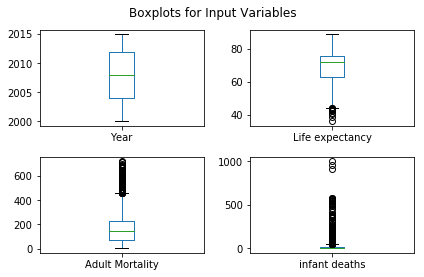

<Figure size 1080x504 with 0 Axes>

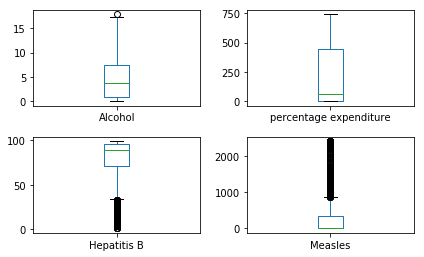

<Figure size 1080x504 with 0 Axes>

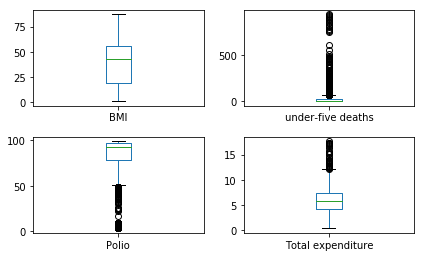

<Figure size 1080x504 with 0 Axes>

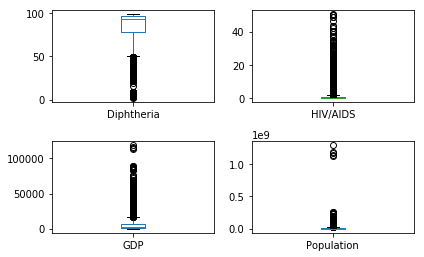

<Figure size 1080x504 with 0 Axes>

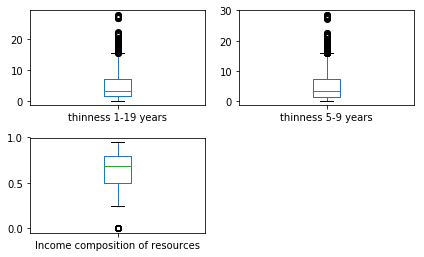

In [239]:
import math

plt.figure(figsize=(15,7))
life_expectancy[[headers[1], headers[3], headers[4], headers[5]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.suptitle('Boxplots for Input Variables\n', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
life_expectancy[[headers[6], headers[7], headers[8], headers[9]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
life_expectancy[[headers[10], headers[11], headers[12], headers[13]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
life_expectancy[[headers[14], headers[15], headers[16], headers[17]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
life_expectancy[[headers[18], headers[19], headers[20]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [240]:
# 'infant deaths', 'percentage expenditure', 'Measles','under-five deaths', 'HIV/AIDS', and 'GDP' seem to have the most outliers,
# but all of the columns have some outliers to deal with. 

#Some outliers exceed maximum ranges, so those need to be addressed, and others should be transformed

#Variables that must have values between 0 and 1,000:
    #'Adult Mortality', 'infant deaths', 'Measles', 'under-five deaths', 'HIV/AIDS'
    
#Variables that must have values between 0 and 100 (%):
    #'percentage expenditure', 'Hepatitis B', 'Polio', 'Total expenditure', 'Diphtheria', 'thinness  1-19 years', 'thinness 5-9 years'
    
#Variables that must have a value between 0 and 1:
    #'Income composition of resources'
    
    
#If any value higher than maximum or lower than minimum, replace with the mean.

for column in ['Adult Mortality', 'infant deaths', 'Measles', 'under-five deaths', 'HIV/AIDS']:
    for i in range(len(life_expectancy[column])):
        if ((life_expectancy[column][i] < 0) or (life_expectancy[column][i] > 1000)):
            life_expectancy[column][i] = life_expectancy[column].mean()
            
for column in ['percentage expenditure', 'Hepatitis B', 'Polio', 'Total expenditure', 'Diphtheria', 'thinness 1-19 years', 'thinness 5-9 years']:
    for i in range(len(life_expectancy[column])):
        if ((life_expectancy[column][i] < 0) or (life_expectancy[column][i] > 100)):
            life_expectancy[column][i] = life_expectancy[column].mean()
            
for i in range(len(life_expectancy['Income composition of resources'])):
    if ((life_expectancy['Income composition of resources'][i] < 0) or (life_expectancy['Income composition of resources'][i] > 1)):
        life_expectancy['Income composition of resources'][i] = life_expectancy['Income composition of resources'].mean()  
        

<Figure size 1080x504 with 0 Axes>

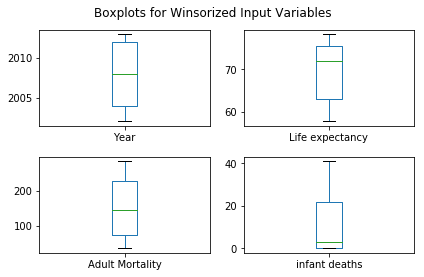

<Figure size 1080x504 with 0 Axes>

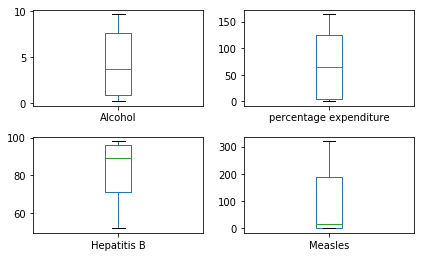

<Figure size 1080x504 with 0 Axes>

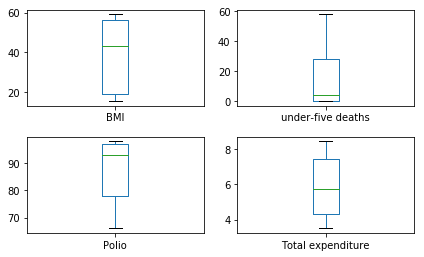

<Figure size 1080x504 with 0 Axes>

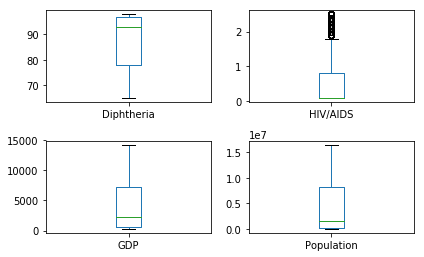

<Figure size 1080x504 with 0 Axes>

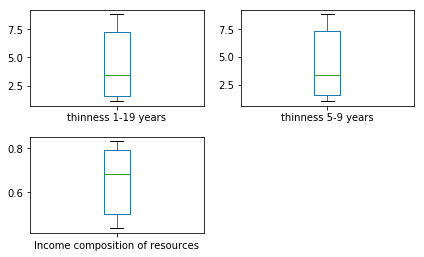

In [241]:
#Transform the rest of the outliers, using winsorize()
from scipy.stats.mstats import winsorize

winsorized_cols = pd.DataFrame()

for column in life_expectancy.columns.drop(['Country', 'Status']):
    winsorized_cols[column] = winsorize(life_expectancy[column], (0.15, 0.15))

    
#Show winsorized boxplots:

plt.figure(figsize=(15,7))
winsorized_cols[[headers[1], headers[3], headers[4], headers[5]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.suptitle('Boxplots for Winsorized Input Variables\n', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
winsorized_cols[[headers[6], headers[7], headers[8], headers[9]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
winsorized_cols[[headers[10], headers[11], headers[12], headers[13]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
winsorized_cols[[headers[14], headers[15], headers[16], headers[17]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15,7))
winsorized_cols[[headers[18], headers[19], headers[20]]].plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [250]:
len(winsorized_cols)

2938

In [270]:
#Now that the outliers and missing values have mostly been fixed, we can perform analysis on the cleaned dataset
expectancy2 = winsorized_cols.copy()
expectancy2['Country'] = list(life_expectancy['Country'])
expectancy2['Year'] = list(life_expectancy['Year'])
expectancy2['Status'] = list(life_expectancy['Status'])

#Determine highest correlations to 'Life expectancy'
expectancy2.corr()['Life expectancy'].sort_values()

HIV/AIDS                          -0.779941
Adult Mortality                   -0.663930
under-five deaths                 -0.614820
thinness 5-9 years                -0.613935
thinness 1-19 years               -0.609928
infant deaths                     -0.588338
Measles                           -0.336541
Population                         0.001591
Year                               0.123761
Total expenditure                  0.264249
Hepatitis B                        0.341210
percentage expenditure             0.387659
Alcohol                            0.420540
GDP                                0.491189
Polio                              0.604759
Diphtheria                         0.605821
BMI                                0.632219
Schooling                          0.762977
Income composition of resources    0.822619
Life expectancy                    1.000000
Name: Life expectancy, dtype: float64

According to the above correlation matrix, the variables with the strongest correlations to 'Life expectancy' are: 'HIV/AIDS' (negative), 'Adult Mortality' (negative), 'thinness 5-9 years' (negative), 'under-five deaths' (negative), 'BMI' (positive), 'Schooling' (positive), and 'Income composition of resources' (positive). Positive correlations mean that life expectancy goes up when the variable value goes up, while negative correlations mean that life expectancy goes up when the variable value goes down, and vice-versa.

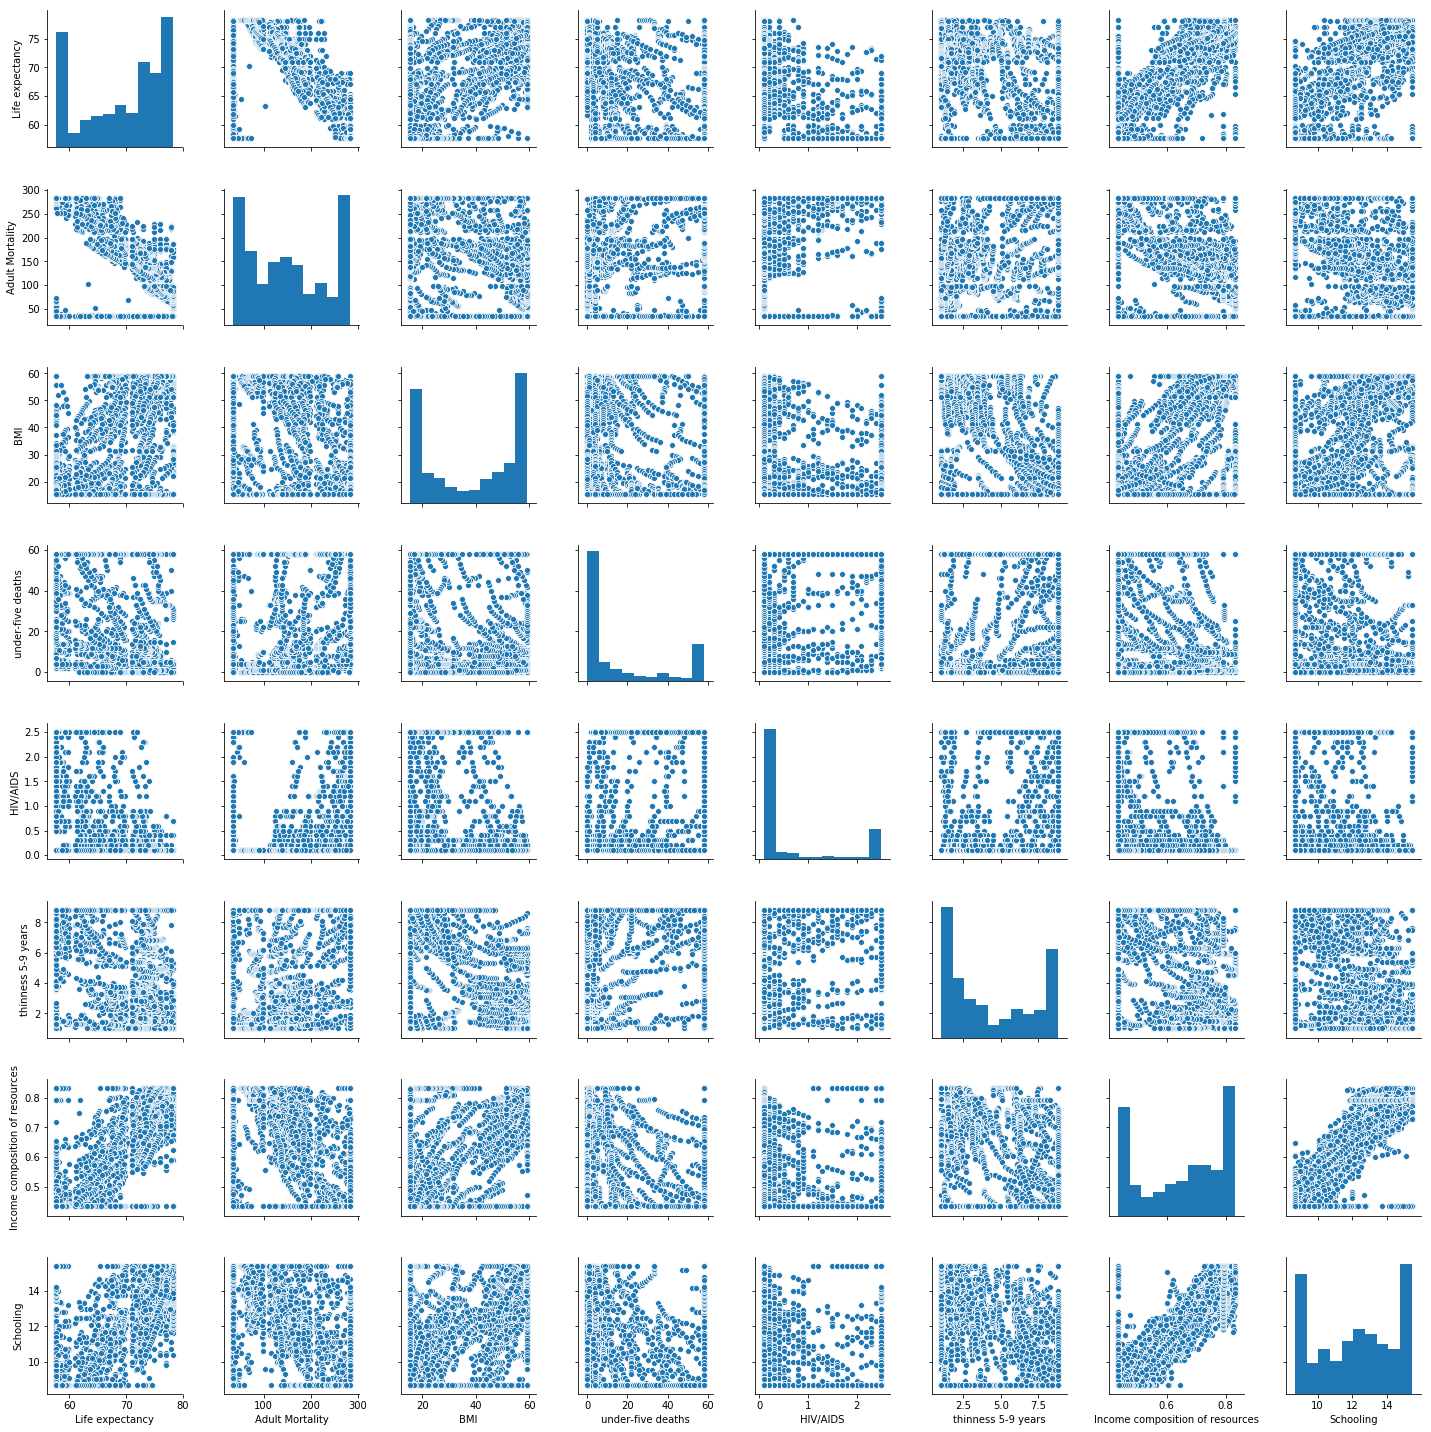

In [271]:
headers2 = list(expectancy2.columns)

#Scatter Matrix of highly correlated variables
pp_cols = [headers2[i] for i in list(np.where(abs(expectancy2.corr()['Life expectancy'])>0.61)[0])]
sns.pairplot(expectancy2[pp_cols])
plt.show()

The scatter matrix/ pairplot produced here illustrates the relationships between all variables that are closely correlated to our variable of interest, Life expectancy. At a quick glance, we can see that the variable with the most linear correlations to each other (i.e. they probably provide similar information) are: 
 - 'Schooling' vs 'Income composition of resources'
 - 'Adult Mortality' vs 'Life expectancy'
 - 'BMI' vs 'Life expectancy'
 - 'Income composition of resources' vs 'Life expectancy'
 - 'Income composition of resources' vs 'BMI'
 - 'Income composition of resources' vs 'Adult Mortality'
 - 'Schooling' vs 'Life expectancy'

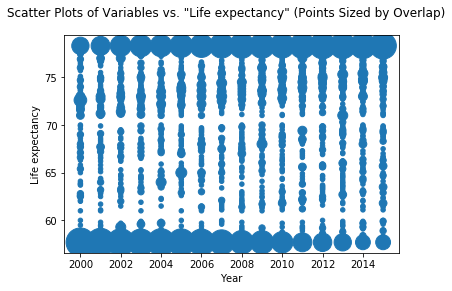

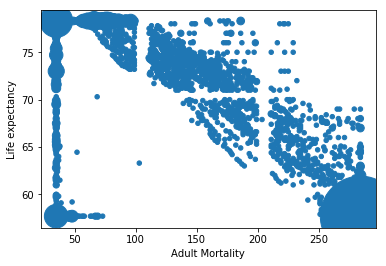

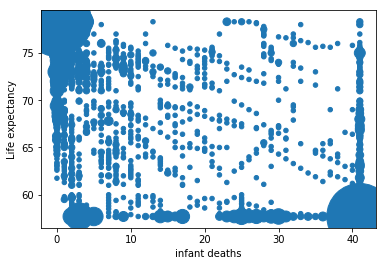

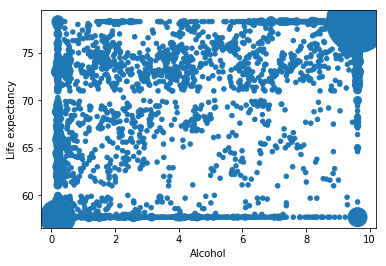

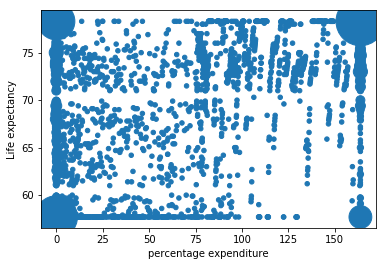

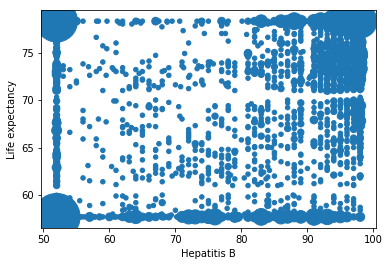

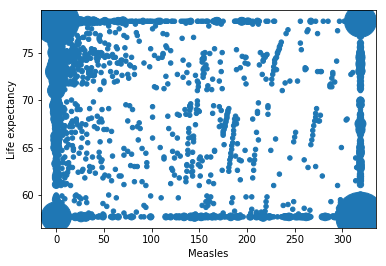

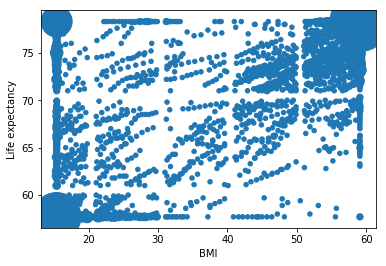

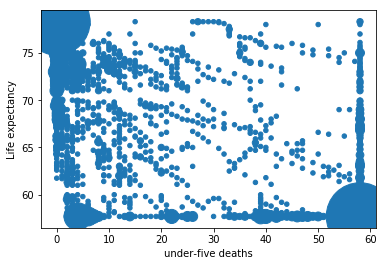

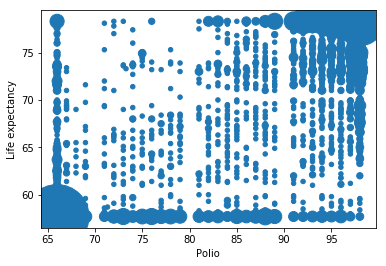

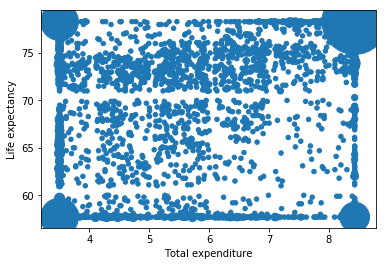

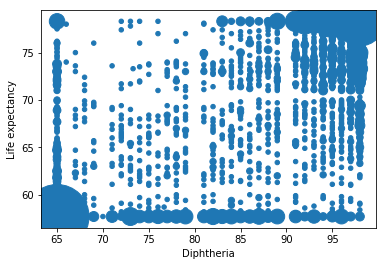

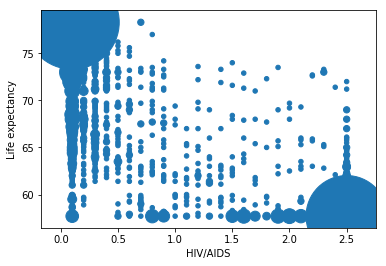

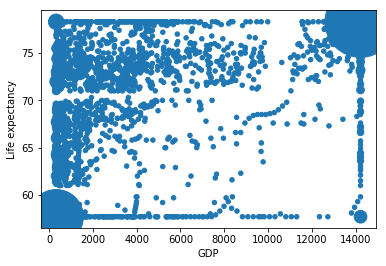

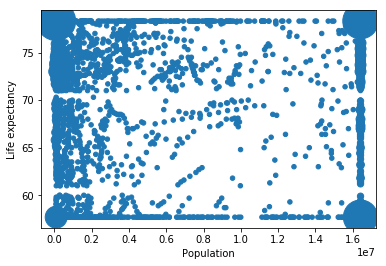

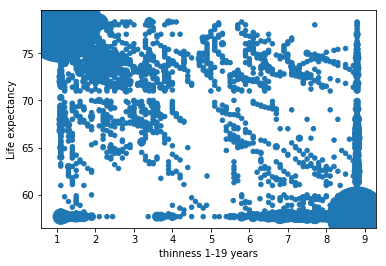

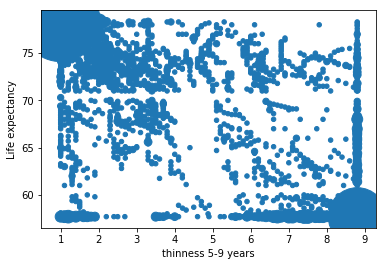

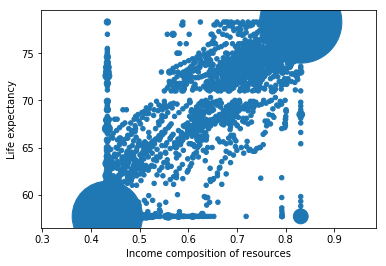

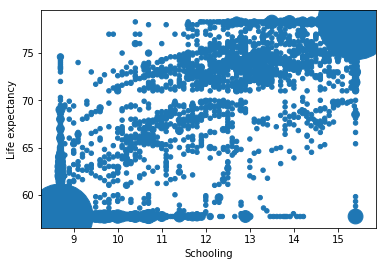

In [272]:
#Deeper exploration the variables and their correlations to our variable of interest
y_var = 'Life expectancy'

plt.suptitle('Scatter Plots of Variables vs. "Life expectancy" (Points Sized by Overlap)')    
for col in [x for x in headers2 if x not in ['Country', 'Status']]:
    if col != 'Life expectancy':
        pp_counts = expectancy2.groupby([col, y_var]).size().reset_index(name='counts')
        plt.scatter(pp_counts[col], pp_counts[y_var], s=pp_counts.counts*20)
        plt.ylabel('Life expectancy')
        plt.xlabel(col)
        plt.show()
    

In these scatterplots, we see that the corners of the plots tend to have high degrees of overlap, as the points get very large. This is likely due to some inherent issue with the data collection process or something to do with how outliers and missing values were dealt with. However, even with the outlines and corners making some of the plots look strange, we can still clearly see that several variables have a linear relationship with 'Life expectancy', namely: 'Adult Mortality' (Negative), 'infant deaths' (Negative), 'BMI' (Positive), 'under-five deaths' (Negative), 'HIV/AIDS' (Negative), both 'thinness' variables (Negative), 'Income composition of resources' (Positive), and 'Schooling' (Positive). The other variables can be discarded to simplify the analysis.

In [294]:
#Feature engineering: create dummies for string categorical variables
unique_status = list(expectancy2['Status'].unique())
unique_country = list(expectancy2['Country'].unique())

#Convert string categorical variables to numerical dummies
dummy_status = []
for row in expectancy2['Status']:
    for i in range(len(unique_status)):
        if row == unique_status[i]:
            dummy_status.append(i)
        
expectancy2['Dummy Status'] = dummy_status


dummy_country = []
for row in expectancy2['Country']:
    for i in range(len(unique_country)):
        if row == unique_country[i]:
            dummy_country.append(i)
        
expectancy2['Dummy Country'] = dummy_country

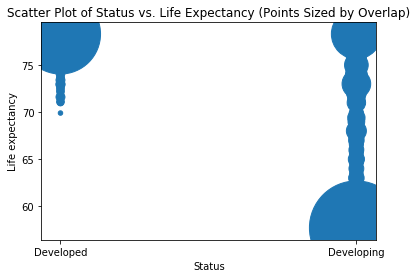

Correlation Between Status and Life Expectancy: 
0.47547476730491484


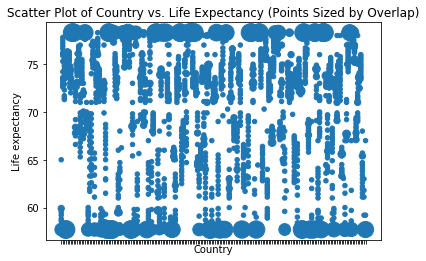

Correlation Between Country and Life Expectancy: 
-0.01751045766497816


In [296]:
pp_counts = expectancy2.groupby(['Status', 'Life expectancy']).size().reset_index(name='counts')
plt.scatter(pp_counts['Status'], pp_counts['Life expectancy'], s=pp_counts.counts*20)
plt.ylabel('Life expectancy')
plt.xlabel('Status')
plt.title('Scatter Plot of Status vs. Life Expectancy (Points Sized by Overlap)')
plt.show()

print('Correlation Between Status and Life Expectancy: ')
print(expectancy2.corr()['Life expectancy'].sort_values()['Dummy Status'])


pp_counts = expectancy2.groupby(['Country', 'Life expectancy']).size().reset_index(name='counts')
plt.scatter(pp_counts['Country'], pp_counts['Life expectancy'], s=pp_counts.counts*20)
plt.ylabel('Life expectancy')
plt.xlabel('Country')
plt.tick_params(axis='both', which='both', bottom='on', top='off', labelbottom='off', right='off', left='on', labelleft='on')
plt.title('Scatter Plot of Country vs. Life Expectancy (Points Sized by Overlap)')
plt.show()

print('Correlation Between Country and Life Expectancy: ')
print(expectancy2.corr()['Life expectancy'].sort_values()['Dummy Country'])


Although the scatter plot of Status versus Life expectancy shows that Developed countries tend to have higher life expectancies than Developing countries, the correlation coefficient between Status and Life expectancy is likely so low (~48%) because there is an overabundance of Developing countries in the dataset, compared to Developed ones, so we don't have enough information to draw any definitive conclusion. Additionally, the dummy variable for the Country categorical didn't provide useful insight neither in the scatter plot nor in its correlation coefficient.

### Conclusion:
Based on all of the exploration done throughout this challenge, I would conclude that the only variables that should be preserved when entering the modeling phase are 'Life exectancy',  'Adult Mortality', 'infant deaths', 'BMI', 'under-five deaths', 'HIV/AIDS', both 'thinness' variables, 'Income composition of resources', and 'Schooling'. However, special attention should be paid to 'HIV/AIDS', 'Adult Mortality', 'BMI', 'Schooling', and 'Income composition of resources'. All of these results make sense, as each of those variables contain data that one might expect to affect the length of the average populations' lifespan.